In [1]:
using Flux
using Flux: Data.DataLoader
using Flux: onehotbatch,onecold,crossentropy
using Flux: @epochs
using Statistics
using MLDatasets
using Plots

In [2]:
x_train_temp,y_train_temp = MNIST.traindata();
x_test_temp,y_test_temp = MNIST.testdata();

In [3]:
println("The size of the training images are $(size(x_train_temp)) and the size of training labels is $(size(y_train_temp))")
print("The size of the testing images are $(size(x_test_temp)) and the size of testing labels is $(size(y_test_temp))")

The size of the training images are (28, 28, 60000) and the size of training labels is (60000,)
The size of the testing images are (28, 28, 10000) and the size of testing labels is (10000,)

In [5]:
x_train = Flux.unsqueeze(x_train_temp[:,:,1:5000],3)
x_test = Flux.unsqueeze(x_test_temp[:,:,1:1000],3)

y_train = onehotbatch(y_train_temp[1:5000],0:9)
y_test = onehotbatch(y_test_temp[1:1000],0:9)

#Displaying the updated shape of the elements

println("The size of the training images are $(size(x_train)) and the size of training labels is $(size(y_train))")
print("The size of the testing images are $(size(x_test)) and the size of testing labels is $(size(y_test))")

train_data = DataLoader(x_train, y_train, batchsize=128);

The size of the training images are (28, 28, 1, 5000) and the size of training labels is (10, 5000)
The size of the testing images are (28, 28, 1, 1000) and the size of testing labels is (10, 1000)

In [6]:
layer1 = Conv((3,3),1=>8,relu,stride=2)
layer2 = Conv((3,3),8=>16,relu)
layer3 = Conv((3,3),16=>32,relu)
layer4 = GlobalMaxPool()
layer5 = flatten
layer6 = Dense(32,10)
layer7 = softmax;

In [7]:
layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]
x = x_train

for l in layers
    println("The layer is $l")
    println("The size of the input layer is $(size(x))")
    x = l(x)
    println("The size of the output layer is $(size(x))")
    println("-"^30)
end

The layer is Conv((3, 3), 1=>8, relu)
The size of the input layer is (28, 28, 1, 5000)


┌ Warning: Slow fallback implementation invoked for conv!  You probably don't want this; check your datatypes.
│   yT = Float32
│   T1 = FixedPointNumbers.Normed{UInt8,8}
│   T2 = Float32
└ @ NNlib C:\Users\Saad.LAKES\.julia\packages\NNlib\fxLrD\src\conv.jl:206


The size of the output layer is (13, 13, 8, 5000)
------------------------------
The layer is Conv((3, 3), 8=>16, relu)
The size of the input layer is (13, 13, 8, 5000)
The size of the output layer is (11, 11, 16, 5000)
------------------------------
The layer is Conv((3, 3), 16=>32, relu)
The size of the input layer is (11, 11, 16, 5000)
The size of the output layer is (9, 9, 32, 5000)
------------------------------
The layer is GlobalMaxPool()
The size of the input layer is (9, 9, 32, 5000)
The size of the output layer is (1, 1, 32, 5000)
------------------------------
The layer is flatten
The size of the input layer is (1, 1, 32, 5000)
The size of the output layer is (32, 5000)
------------------------------
The layer is Dense(32, 10)
The size of the input layer is (32, 5000)
The size of the output layer is (10, 5000)
------------------------------
The layer is softmax
The size of the input layer is (10, 5000)
The size of the output layer is (10, 5000)
------------------------------

In [8]:
model = Chain(layer1, layer2, layer3, layer4, layer5,layer6, layer7)
L(x,y) = Flux.crossentropy(model(x),y)
opt = Flux.Optimise.ADAM()
ps = Flux.params(model)
training_loss = Vector{Float64}()
validation_loss = Vector{Float64}()

training_accuracy= Vector{Float64}()
validation_accuracy = Vector{Float64}()

accuracy(ŷ, y) = mean(onecold(ŷ) .== onecold(y))

println(size(training_loss))
println(size(validation_loss))

total_step = 10

for step in 1:total_step
    Flux.train!(L,ps,train_data,opt)
    println("EPOCH NUMBER: $step")
    println("Training Loss is $(L(x_train,y_train))")
    println("Validation Loss is $(L(x_test,y_test))")
    println("-"^50)
    push!(training_loss,L(x_train,y_train))
    push!(validation_loss,L(x_test,y_test))
    
    push!(training_accuracy,accuracy(model(x_train),y_train))
    push!(validation_accuracy,accuracy(model(x_test),y_test))
end

(0,)
(0,)


┌ Warning: Slow fallback implementation invoked for ∇conv_filter!  You probably don't want this; check your datatypes.
│   yT = Float32
│   T1 = FixedPointNumbers.Normed{UInt8,8}
│   T2 = Float32
└ @ NNlib C:\Users\Saad.LAKES\.julia\packages\NNlib\fxLrD\src\conv.jl:206


EPOCH NUMBER: 1
Training Loss is 2.1575284
Validation Loss is 2.1664102
--------------------------------------------------
EPOCH NUMBER: 2
Training Loss is 1.4864494
Validation Loss is 1.5448323
--------------------------------------------------
EPOCH NUMBER: 3
Training Loss is 0.73922306
Validation Loss is 0.85528654
--------------------------------------------------
EPOCH NUMBER: 4
Training Loss is 0.4951416
Validation Loss is 0.61276335
--------------------------------------------------
EPOCH NUMBER: 5
Training Loss is 0.39214393
Validation Loss is 0.5077751
--------------------------------------------------
EPOCH NUMBER: 6
Training Loss is 0.33120143
Validation Loss is 0.43990186
--------------------------------------------------
EPOCH NUMBER: 7
Training Loss is 0.2916771
Validation Loss is 0.3969089
--------------------------------------------------
EPOCH NUMBER: 8
Training Loss is 0.26448262
Validation Loss is 0.36843294
--------------------------------------------------
EPOCH NU

In [11]:
loss = hcat(training_loss,validation_loss)
metric = hcat(training_accuracy,validation_accuracy);

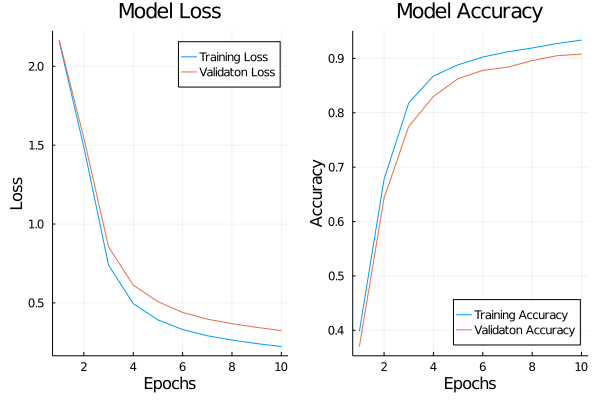

In [21]:
plot(plot(1:total_step,loss,title="Model Loss", label=["Training Loss" "Validaton Loss"],xlabel="Epochs",ylabel="Loss"),
plot(1:total_step,metric,title="Model Accuracy", label=["Training Accuracy" "Validaton Accuracy"],xlabel="Epochs",ylabel="Accuracy",legend=:bottomright))

In [19]:
savefig(output)

LoadError: MethodError: no method matching png(::Plots.Plot{Plots.GRBackend})
Closest candidates are:
  png(::Plots.Plot, !Matched::AbstractString) at C:\Users\Saad.LAKES\.julia\packages\Plots\IjNHT\src\output.jl:4
  png(!Matched::AbstractString) at C:\Users\Saad.LAKES\.julia\packages\Plots\IjNHT\src\output.jl:10